In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model
model = Sequential()

layer1 = Flatten(input_shape = (28,28))
layer2 = Dense(16, activation = 'relu')
layer3 = Dense(16, activation = 'relu')

model.add(layer1)
model.add(layer2)
model.add(layer3)

print(layer2.input_shape)

model.add(Dense(10, activation = 'softmax'))

(None, 784)


In [5]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [20]:
# Build the Sequential convolutional neural network model

model = Sequential()

layer1 = Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1))
layer2 = MaxPooling2D((3,3))
layer3 = Flatten()
layer4 = Dense(10, activation = 'softmax')

model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)

In [21]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [22]:
# Define the model optimizer, loss function and metrics
import tensorflow as tf
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [23]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)


sparse_categorical_crossentropy


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [13]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [14]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [15]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

Dress


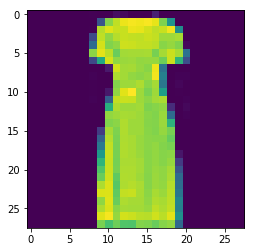

In [28]:
# Display one of the images

i = 50
img = train_images[i]
plt.imshow(img)
print(labels[train_labels[i]])

In [17]:
print(train_labels.shape)

(60000,)


In [18]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images/ 255.

#### Fit the model

In [24]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs = 2, batch_size = 256)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 57s 943us/sample - loss: 0.8420 - accuracy: 0.7222
Epoch 2/2
60000/60000 [==============================] - 55s 918us/sample - loss: 0.4772 - accuracy: 0.8309


#### Plot training history

In [1]:
model.summary()

NameError: name 'model' is not defined

In [25]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.842028,0.722217
1,0.477203,0.830933


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

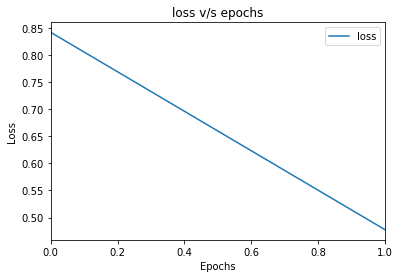

In [26]:
# Make a plot for the loss
loss_plot = df.plot(y= 'loss', title= 'loss v/s epochs')
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')


[Text(0, 0.5, 'Acc'), Text(0.5, 0, 'epochs')]

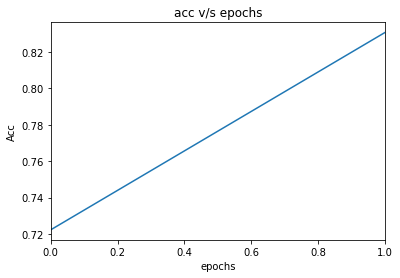

In [27]:
# Make a plot for the accuracy

acc_plot = df.plot(y = 'accuracy', title = 'acc v/s epochs',legend = False)
acc_plot.set(xlabel='epochs', ylabel='Acc')

In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [34]:
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images[...,np.newaxis], test_labels,verbose = 2)
print(test_loss)

10000/1 - 5s - loss: 0.3662 - accuracy: 0.8361
0.46338723430633544


#### Make predictions from the model

4400


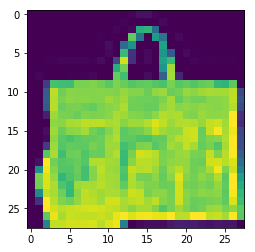

Label: Bag


In [42]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
print(random_inx)
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [43]:
# Get the model predictions

prediction = model.predict(test_image[np.newaxis,..., np.newaxis])

print(labels[np.argmax(prediction)])

Bag


In [38]:
print(test_image.shape)

(28, 28)
